In [1]:
import numpy as np
import pandas as pd
from sklearn.tree import DecisionTreeClassifier 
from sklearn.model_selection import train_test_split 
from sklearn import metrics 
from sklearn.tree import export_graphviz
from six import StringIO
from IPython.display import Image
import pydotplus
import numpy as np
import matplotlib.pyplot as plt

In [2]:
ttt = pd.read_csv("tic-tac-toe.csv")
cols = ["top-left", "top-middle", "top-right", "middle-left", "center", 
        "middle-right", "bottom-left", "bottom-middle", "bottom-right"]
ttt

,top-left,top-middle,top-right,middle-left,center,middle-right,bottom-left,bottom-middle,bottom-right,winner
0,x,x,x,x,o,o,x,o,o,positive
1,x,x,x,x,o,o,o,x,o,positive
2,x,x,x,x,o,o,o,o,x,positive
3,x,x,x,x,o,o,o,b,b,positive
4,x,x,x,x,o,o,b,o,b,positive
...,...,...,...,...,...,...,...,...,...,...
953,o,x,x,x,o,o,o,x,x,negative
954,o,x,o,x,x,o,x,o,x,negative
955,o,x,o,x,o,x,x,o,x,negative
956,o,x,o,o,x,x,x,o,x,negative


# Step 1: Data preprocessing
<ol>
<li>Remove Nulls</li>
<li>Replace x, o ,b with 0,1,2</li>
<li>Replace positive with 1 and negative with 0</li>
</ol>

In [3]:
ttt = ttt.dropna()
ttt = pd.get_dummies(ttt)
ttt

,top-left_b,top-left_o,top-left_x,top-middle_b,top-middle_o,top-middle_x,top-right_b,top-right_o,top-right_x,middle-left_b,...,bottom-left_o,bottom-left_x,bottom-middle_b,bottom-middle_o,bottom-middle_x,bottom-right_b,bottom-right_o,bottom-right_x,winner_negative,winner_positive
0,0,0,1,0,0,1,0,0,1,0,...,0,1,0,1,0,0,1,0,0,1
1,0,0,1,0,0,1,0,0,1,0,...,1,0,0,0,1,0,1,0,0,1
2,0,0,1,0,0,1,0,0,1,0,...,1,0,0,1,0,0,0,1,0,1
3,0,0,1,0,0,1,0,0,1,0,...,1,0,1,0,0,1,0,0,0,1
4,0,0,1,0,0,1,0,0,1,0,...,0,0,0,1,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
953,0,1,0,0,0,1,0,0,1,0,...,1,0,0,0,1,0,0,1,1,0
954,0,1,0,0,0,1,0,1,0,0,...,0,1,0,1,0,0,0,1,1,0
955,0,1,0,0,0,1,0,1,0,0,...,0,1,0,1,0,0,0,1,1,0
956,0,1,0,0,0,1,0,1,0,0,...,0,1,0,1,0,0,0,1,1,0


# Step 2 Split the training and testing set
<ol>
<li>Split independent set and dependent set</li>
<li>Split train and test</li>
<li>Fit tree</li>
<ul>
    <li>Find accuracy</li>
    <li>Post prune</li>
</ul>
<li>Plot tree</li>
</ol>

### 1. Spliting independent and dependent sets

In [4]:
x = ttt.drop(columns=['winner_negative', 'winner_positive'])
y = ttt.loc[:,('winner_positive')]

### 2. Spliting training and test sets

In [5]:
# split train set and test set
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size=0.3, random_state=1) 

### 3. Fit tree
<ol>
    <li>No pruning</li>
    <li>Adding max_depth</li>
</ol>

In [7]:
# first run
clf = DecisionTreeClassifier()  # create a classifier object

clf = clf.fit(xtrain, ytrain)  # fit training data

In [98]:
clf = DecisionTreeClassifier(max_depth=5)  # create a classifier object

clf = clf.fit(xtrain, ytrain)  # fit training data

In [11]:
# second run
clf = DecisionTreeClassifier(criterion="entropy",max_depth=5)  # create a classifier object

clf = clf.fit(xtrain, ytrain)  # fit training data

In [6]:
# Post processing run
clf = DecisionTreeClassifier(criterion="entropy", max_depth=5, ccp_alpha=0.015)

clf = clf.fit(xtrain, ytrain)  # fit training data

### 4a. Find Accuracy
This will be used repeatedly so I don't have to repeat code

In [7]:
ypred = clf.predict(xtest)  #  predict y values

accuracy = metrics.accuracy_score(ytest, ypred)
print(f"Accuracy: {accuracy}")

Accuracy: 0.8715277777777778


### 4b. Post pruning

In [7]:
path = clf.cost_complexity_pruning_path(xtrain, ytrain)
ccp_alphas, impurities = path.ccp_alphas, path.impurities

In [8]:
trees = [] # create a list of decision trees

# Iterate through every effetive alpha
for ccp_alpha in ccp_alphas:
    # create decision trees iteratively
    clf = DecisionTreeClassifier(ccp_alpha=ccp_alpha)
    clf.fit(xtrain, ytrain) # fit the tree
    trees.append(clf) # add the tree to the list of decision trees

In [9]:
# get accuracy scores and training scores for clfs
tests = [clf.score(xtest, ytest) for clf in trees]
trains = [clf.score(xtrain, ytrain) for clf in trees]

<function matplotlib.pyplot.show(close=None, block=None)>

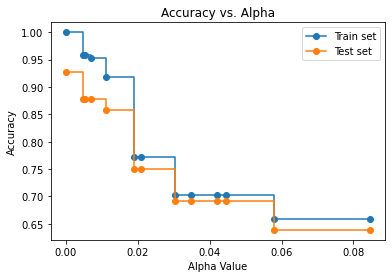

In [10]:
fig, alpha_plot = plt.subplots()
# set x and y labels
alpha_plot.set_xlabel('Alpha Value')
alpha_plot.set_ylabel('Accuracy')
alpha_plot.set_title('Accuracy vs. Alpha')

# plot training accuracies
alpha_plot.plot(ccp_alphas, trains, marker="o", label="Train set", drawstyle="steps-post")
# plot test accuracies
alpha_plot.plot(ccp_alphas, tests, marker="o", label="Test set", drawstyle="steps-post")

alpha_plot.legend()
plt.show

### 5. Plot Tree

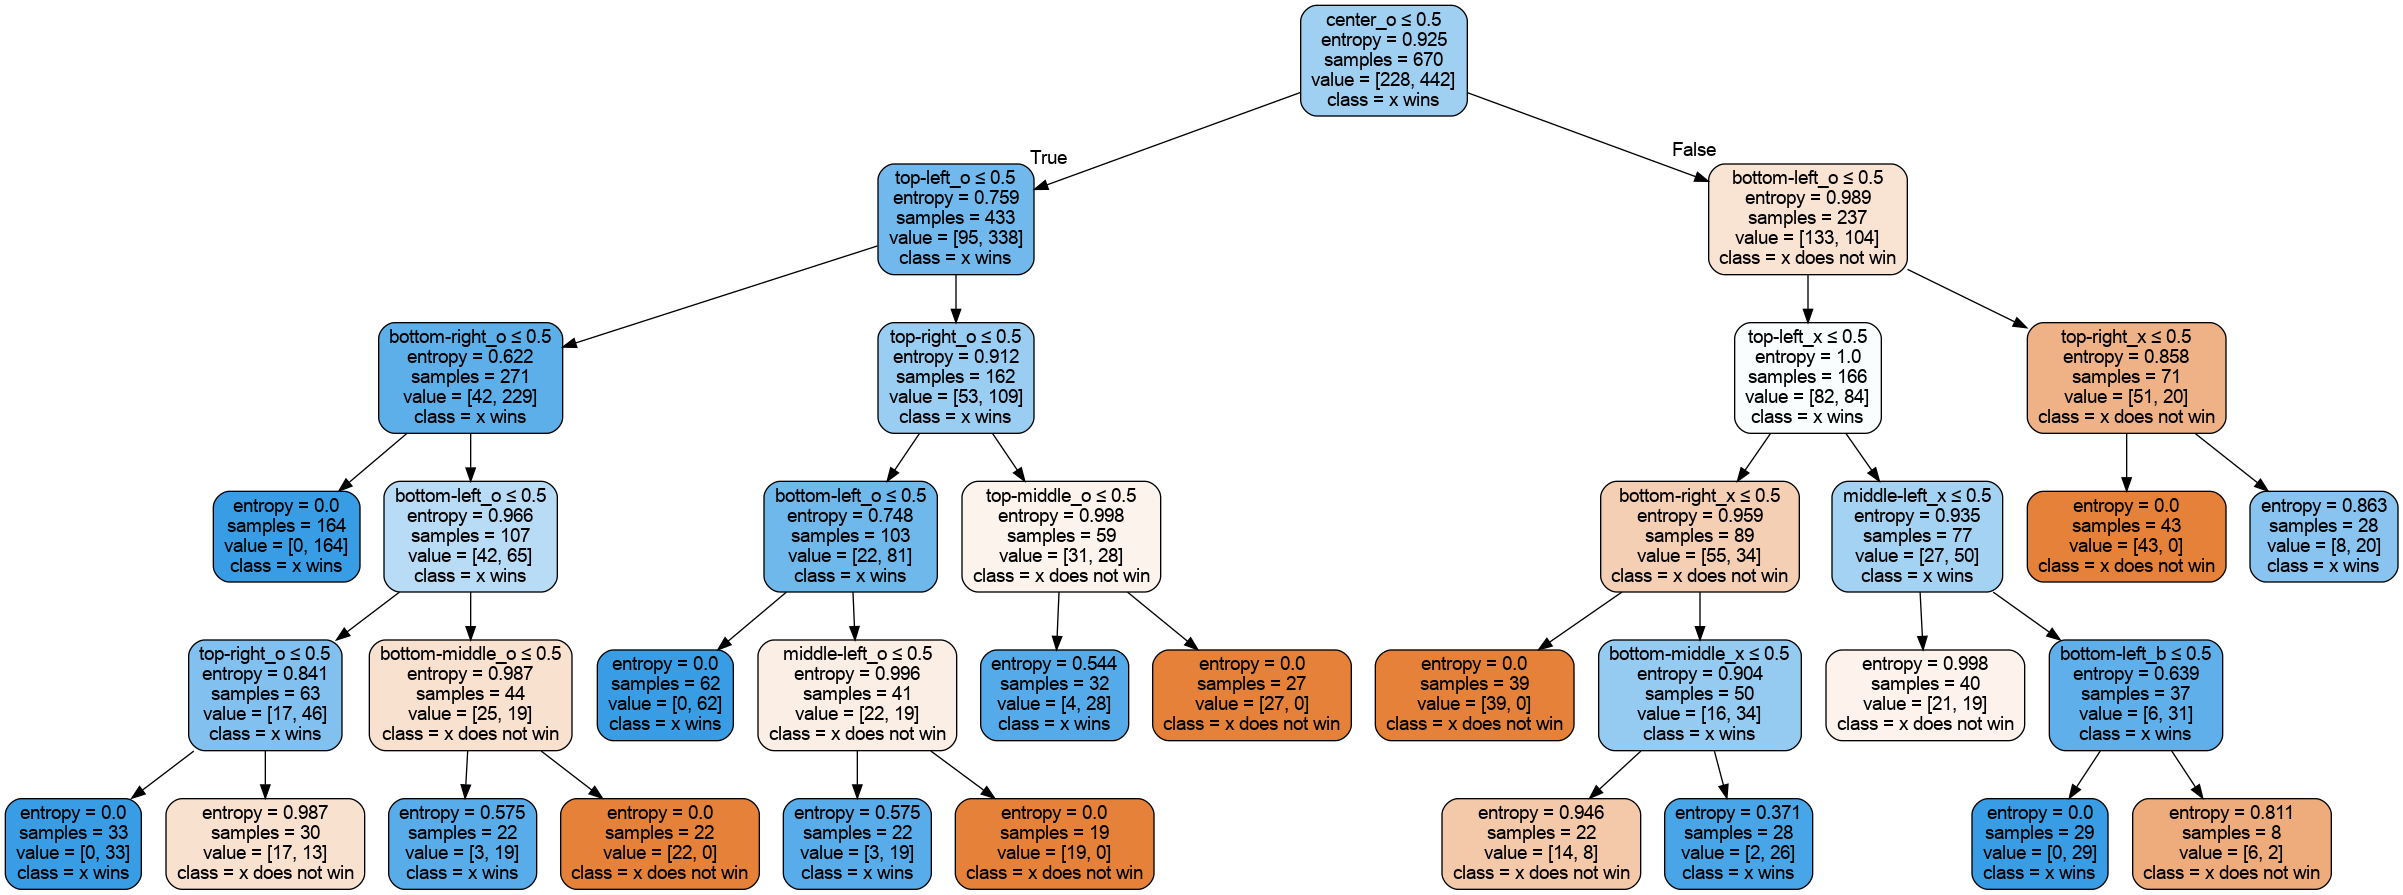

In [13]:
dot_data = StringIO()

export_graphviz(clf, out_file=dot_data,  
               filled=True, rounded=True,
               special_characters=True,feature_names = x.columns, class_names=['x does not win', 'x wins'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
Image(graph.create_png())

In [10]:
graph.write_png('ttt_trees/alphas_015.png')

True